In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects
import plotly.express
import scipy.stats as st

In [2]:
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


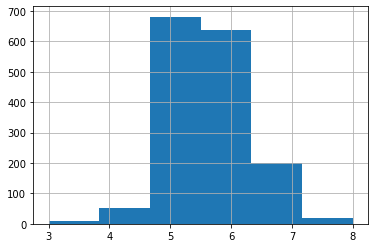

In [4]:
wine_df['quality'].hist(bins=6)

# **apply statistics test for fixed acidity**

**Применяем Хи квадрат для оцентки принадлежности к определенному распределению**

**assume some initial distribution**

In [5]:
p_expected = [0.01, 0.3, 0.05, 0.3, 0.22, 0.12]
freq_observed = [wine_df.loc[wine_df['quality'] == i].shape[0] / wine_df.shape[0] for i in range(3, 9)]

In [6]:
st.chisquare(freq_observed, p_expected)

Power_divergenceResult(statistic=3.2373658380613946, pvalue=0.6634437320622432)

**Применяем Z критерий для нахождения среднего**

In [7]:
wine_df['fixed acidity'].mean()

8.319637273295838

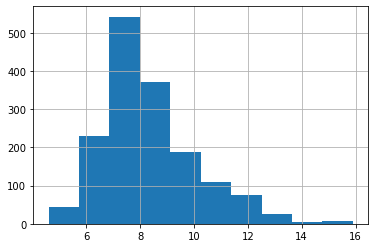

In [8]:
wine_df['fixed acidity'].hist()

**assign mu 0 as zero hypotesys**

In [9]:
mu_0 = 8.23429688066657

In [10]:
Z = (
    (wine_df['fixed acidity'].mean() - mu_0) 
    / (np.std(wine_df['fixed acidity'], ddof=1) / np.sqrt(wine_df['fixed acidity'].shape[0]))
)

In [11]:
Z

1.9600000000000035

**одностроняя 1 гипотеза H1 что fixed acidity больше чем предположение mu 0**

In [12]:
1 - st.norm.cdf(Z)

0.02499789514822026

**одностроняя 1 гипотеза H1 что fixed acidity меньше чем предположение mu 0**

In [13]:
st.norm.cdf(Z)

0.9750021048517797

**двухсторонняя 1 гипотеза H1 что fixed acidity меньше или больше чем предположение mu 0**

In [14]:
2 * (1 - st.norm.cdf(abs(Z)))

0.04999579029644052

In [15]:
Cl = wine_df['fixed acidity'].mean() - 1.96*(np.std(wine_df['fixed acidity'], ddof=1) / np.sqrt(wine_df['fixed acidity'].shape[0]))
Cr = wine_df['fixed acidity'].mean() + 1.96*(np.std(wine_df['fixed acidity'], ddof=1) / np.sqrt(wine_df['fixed acidity'].shape[0]))

In [16]:
Cl, Cr

(8.23429688066657, 8.404977665925106)

# **apply Shapiro_Wilks test for free sulfur dioxide**

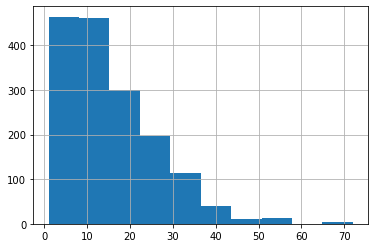

In [17]:
wine_df['free sulfur dioxide'].hist()

In [18]:
st.shapiro(wine_df['free sulfur dioxide'])

ShapiroResult(statistic=0.9018407464027405, pvalue=7.6973984391279615e-31)

# **apply Shapiro_Wilks test for fixed acidity**

In [19]:
st.shapiro(wine_df['fixed acidity'])

ShapiroResult(statistic=0.942030668258667, pvalue=1.5255951637239901e-24)

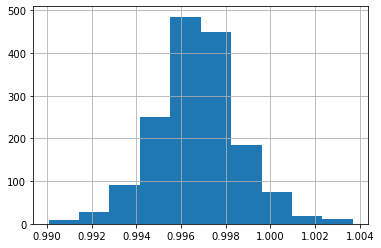

In [20]:
wine_df['density'].hist()

In [21]:
st.shapiro(wine_df['density'])

ShapiroResult(statistic=0.9908668398857117, pvalue=1.9400959061499634e-08)

In [22]:
temp_data = st.norm.rvs(loc=100, scale=27, size=1000)

In [23]:
st.shapiro(temp_data)

ShapiroResult(statistic=0.9991318583488464, pvalue=0.9321138262748718)

# ДЗ

1. Методичка по тестам на примере данного датасета
2. Методичка по непараметрическим тестам для датасета

# **ГИСТОГРАММЫ ВСЕХ ФИЧЕЙ В ДАТАСЕТЕ**

In [24]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


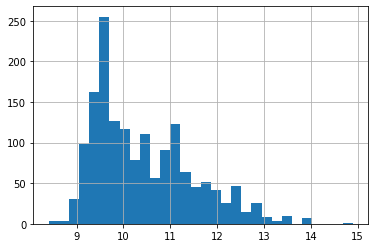

In [41]:
wine_df['alcohol'].hist(bins=30)

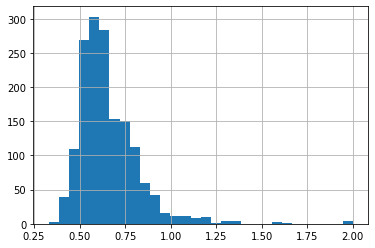

In [40]:
wine_df['sulphates'].hist(bins=30)

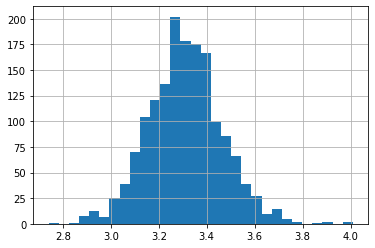

In [39]:
wine_df['pH'].hist(bins=30)

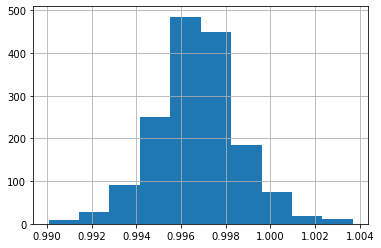

In [33]:
wine_df['density'].hist()

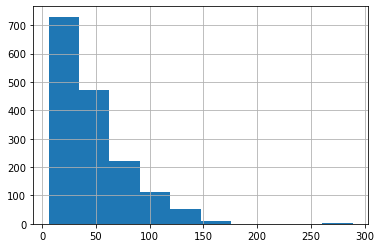

In [32]:
wine_df['total sulfur dioxide'].hist()

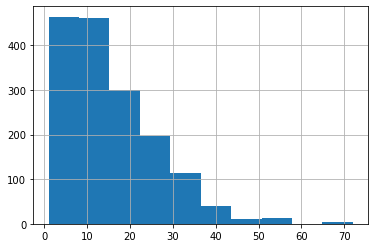

In [31]:
wine_df['free sulfur dioxide'].hist()

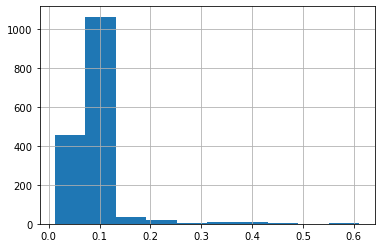

In [30]:
wine_df['chlorides'].hist()

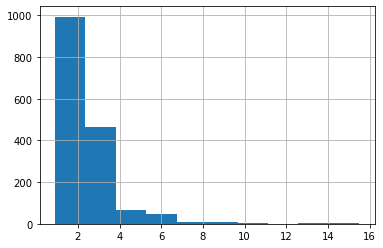

In [29]:
wine_df['residual sugar'].hist()

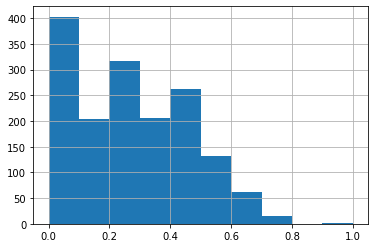

In [28]:
wine_df['citric acid'].hist()

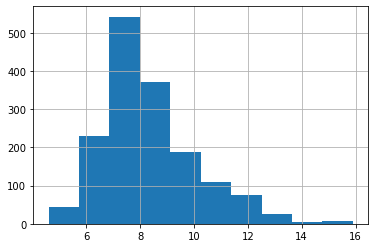

In [26]:
wine_df['fixed acidity'].hist()

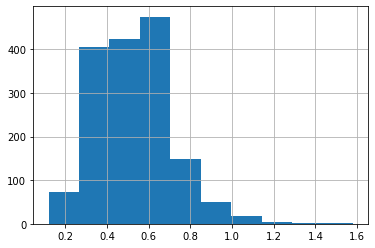

In [27]:
wine_df['volatile acidity'].hist()